Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 28, 17, 60)        600       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 14, 8, 60)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 12, 6, 60)         32460     
_________________________________________________________________
flatten_31 (Flatten)         (None, 4320)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 72)                311112    
_________________________________________________________________
dense_62 (Dense)             (None, 36)                2628      
Total params: 346,800
Trainable params: 346,800
Non-trainable params: 0
_______________________________________________

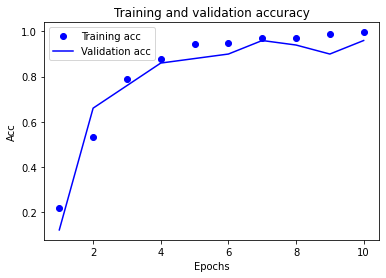

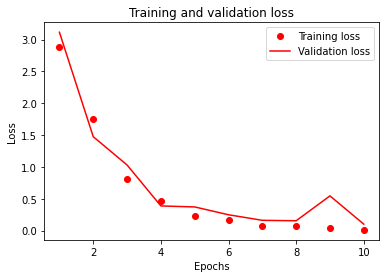


*****************************************************************
captcha picture: 


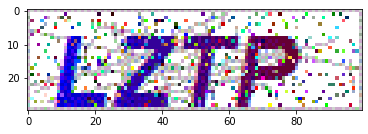

img shape:  (30, 100)


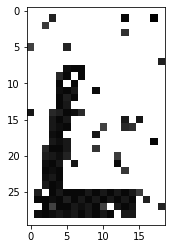

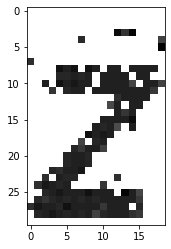

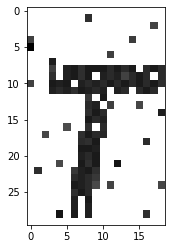

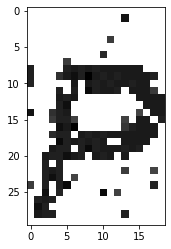

-----------
predict_ans:  LZTP
-----------


<Figure size 432x288 with 0 Axes>

In [34]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
import keras
from PIL import Image


img_list = list()
label_list = list()

# load
import os

filepath = './dataset'
files = os.listdir(filepath)

# split image
for pic in files:
    plus = 0
    for i in range(4):
        img = Image.open(filepath+'\\'+pic)
        img=img.convert('L')
        img=np.asarray(img)
        name = pic[i]
        # alpha need more space
        if name.isalpha():
            plus += 3

        if i == 0:
            img = img[:,8:27]
        elif i == 1:
            img = img[:,23+plus:42+plus]
        elif i == 2:
            img = img[:,38+plus:57+plus]
        elif i == 3:
            img = img[:,53+plus:72+plus]
            
        img_list.append(img)
        
        if name.isalpha():
            label_list.append(ord(name)-55)
        else:
            label_list.append(name)
            
imgnp = np.array(img_list)
imgnp = imgnp.reshape(400, 30, 19,1)
imgnp = imgnp.astype('float32')/255
labelnp = keras.utils.to_categorical(label_list, num_classes=36)

for i in range(imgnp.shape[0]):
    for j in range(imgnp.shape[1]):
        for k in range(imgnp.shape[2]):
            if imgnp[i, j, k] > 0.3:
                imgnp[i, j, k] = 1


train_img = imgnp[0:300]
test_img = imgnp[300:350]
img_val = imgnp[350:400]

train_label = labelnp[0:300]
test_label = labelnp[300:350]
label_val = labelnp[350:400]


# build model
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Conv2D(60, (3, 3), activation='relu', input_shape=(30, 19,1)))
network.add(layers.MaxPooling2D((2, 2)))
network.add(layers.Conv2D(60, (3, 3), activation='relu'))

network.add(layers.Flatten())
network.add(layers.Dense(72, activation='relu'))
network.add(layers.Dense(36, activation='softmax'))

print(network.summary(), '\n\n')
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history = network.fit(train_img, 
                      train_label, 
                      epochs=10, 
                      batch_size=10,
                      validation_data=(img_val, label_val))


# evaluate
test_loss, test_acc = network.evaluate(test_img, test_label)

print('test_acc:', test_acc)

history_dict = history.history

# plot acc
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)

plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
plt.clf()

# plot loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

print("\n*****************************************************************")

# requests
import requests

img = requests.get('https://portal.yzu.edu.tw/cosSelect/ImageCode.aspx')
with open('C:\\Users\\mark3\\Desktop\\class\\ML\\final_pro\\ex\\0.jpg','wb') as f:
    f.write(img.content)

image = Image.open('C:\\Users\\mark3\\Desktop\\class\\ML\\final_pro\\ex\\0.jpg')
print('captcha picture: ')
plt.imshow(image)
plt.show()
plt.clf()

# get num
ans_img_list = list()
ans = []

image = Image.open('C:\\Users\\mark3\\Desktop\\class\\ML\\final_pro\\ex\\0.jpg')
img=image.convert('L')
img=np.asarray(img)

print("img shape: ", img.shape)
img = img[:,8:27]
ans_img_list.append(img)

a = np.array(ans_img_list)

a = a.reshape(1, 30, 19,1)
a = a.astype('float32')/255
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        for k in range(a.shape[2]):
            if a[i, j, k] > 0.3:
                a[i, j, k] = 1


plt.imshow(a[0], cmap='gray')
plt.show()
plt.clf()

pre = network.predict(a)
pre = np.argmax(pre[0])
ans.append(pre)

plus = 0
for i in range(1,4):
    image = Image.open('C:\\Users\\mark3\\Desktop\\class\\ML\\final_pro\\ex\\0.jpg')
    img=image.convert('L')
    img=np.asarray(img)
    
    name = ans[i-1]
    if name>=10:
        plus += 3
    if i == 0:
        img = img[:,8:27]
    elif i == 1:
        img = img[:,23+plus:42+plus]
    elif i == 2:
        img = img[:,38+plus:57+plus]
    elif i == 3:
        img = img[:,53+plus:72+plus]
    ans_img_list.append(img)

    a = np.array(ans_img_list[i])
    a = a.reshape(1, 30, 19,1)
    a = a.astype('float32')/255
    
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            for k in range(a.shape[2]):
                if a[i, j, k] > 0.3:
                    a[i, j, k] = 1
    for i in a:
        plt.imshow(i, cmap = 'gray')
        plt.show()
        plt.clf()
    pre = network.predict(a)
    ans.append(np.argmax(pre[0]))

# turn list into string
str_ans = ''
for i in range(4):
    tmp = ans[i]
    if tmp >= 10:
        str_ans += chr(tmp+55)
    else:
        str_ans += str(tmp)
print('-----------')
print('predict_ans: ', str_ans)
print('-----------')